**26/02/2026**
1.Gaussian Navie Bayes using Iris

In [17]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ( classification_report, confusion_matrix, accuracy_score )

In [19]:
#load datasets
iris =load_iris()
x=iris.data
y=iris.target

In [20]:
print("feature name:",iris.feature_names)
print("target Name:", iris.target_names)

feature name: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target Name: ['setosa' 'versicolor' 'virginica']


In [21]:
#divide the data into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [23]:
y_train.shape, y_test.shape

((120,), (30,))

In [24]:
#train Model
model =GaussianNB()
model.fit(x_train,y_train)

#

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [25]:
#prediciton
y_pred =model.predict(x_test)

In [26]:
#Evaluation
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [27]:
#classifiction report
print("Classification Report:",classification_report(y_test,y_pred))

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
#confusion matrix
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Text(50.722222222222214, 0.5, 'Actual')

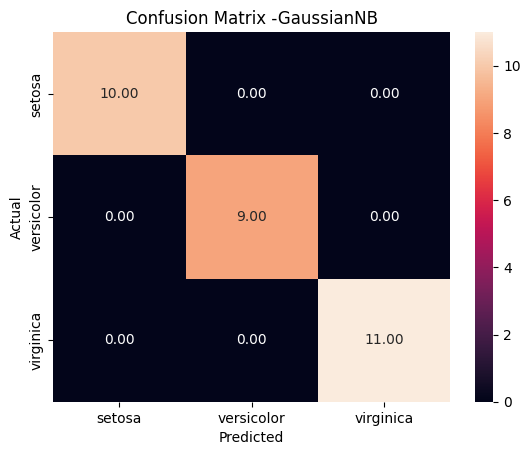

In [29]:
#print the heatmap
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt=".2f",xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.title("Confusion Matrix -GaussianNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [30]:
#few sample prediction
print("\nPredicted Probabilities(First 5 samples):\n")
print(model.predict_proba(x_test[:5]))


Predicted Probabilities(First 5 samples):

[[5.97327448e-090 9.95635767e-001 4.36423302e-003]
 [1.00000000e+000 4.96158126e-014 6.54922363e-021]
 [7.31890302e-290 4.92947614e-012 1.00000000e+000]
 [2.81842533e-094 9.77593559e-001 2.24064412e-002]
 [1.13877801e-105 8.70022596e-001 1.29977404e-001]]


In [31]:
probs = model.predict_proba(x_test[:5])

In [32]:
import pandas as pd

prob_df = pd.DataFrame(
    probs,
    columns=iris.target_names
)

print("\nProbabilities DataFrame:")
print(prob_df)


Probabilities DataFrame:
          setosa    versicolor     virginica
0   5.973274e-90  9.956358e-01  4.364233e-03
1   1.000000e+00  4.961581e-14  6.549224e-21
2  7.318903e-290  4.929476e-12  1.000000e+00
3   2.818425e-94  9.775936e-01  2.240644e-02
4  1.138778e-105  8.700226e-01  1.299774e-01


## Multinomial Naive bayes (MNB)##
word frequency in Document (text classification )


In [33]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text  import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix 
import seaborn as sns


In [34]:
#sample data
texts= [
    "Win money now",
    "Limited time offer win cash",
    "Call now for free prize",
    "Hi how are you ",
    "Let's meet for lunch",
    "Are you coming to class",
    "Free lottery win money "
    "Important project discossion tomorrow" 
]

In [35]:
#b assign labels
labels =[1,1,1,0,0,0,1,0]

In [36]:
Vectorizer = CountVectorizer()
x =Vectorizer.fit_transform(texts)

In [38]:
print(x)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 34 stored elements and shape (7, 26)>
  Coords	Values
  (0, 24)	1
  (0, 16)	1
  (0, 17)	1
  (1, 24)	1
  (1, 12)	1
  (1, 21)	1
  (1, 18)	1
  (1, 2)	1
  (2, 17)	1
  (2, 1)	1
  (2, 6)	1
  (2, 7)	1
  (2, 19)	1
  (3, 8)	1
  (3, 9)	1
  (3, 0)	1
  (3, 25)	1
  (4, 6)	1
  (4, 11)	1
  (4, 15)	1
  (4, 14)	1
  (5, 0)	1
  (5, 25)	1
  (5, 4)	1
  (5, 22)	1
  (5, 3)	1
  (6, 24)	1
  (6, 16)	1
  (6, 7)	1
  (6, 13)	1
  (6, 10)	1
  (6, 20)	1
  (6, 5)	1
  (6, 23)	1


In [39]:
y = labels

In [40]:
print("Vocabulary:",Vectorizer.get_feature_names_out())
print("\nWord frequencies:\n",x.toarray())

Vocabulary: ['are' 'call' 'cash' 'class' 'coming' 'discossion' 'for' 'free' 'hi' 'how'
 'important' 'let' 'limited' 'lottery' 'lunch' 'meet' 'money' 'now'
 'offer' 'prize' 'project' 'time' 'to' 'tomorrow' 'win' 'you']

Word frequencies:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0]
 [0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0]]


In [43]:
model = MultinomialNB()
model.fit(x_train,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [44]:
y_pred = model.predict(x_test)


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      1.00      0.86         9
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.90        30
weighted avg       0.93      0.90      0.90        30



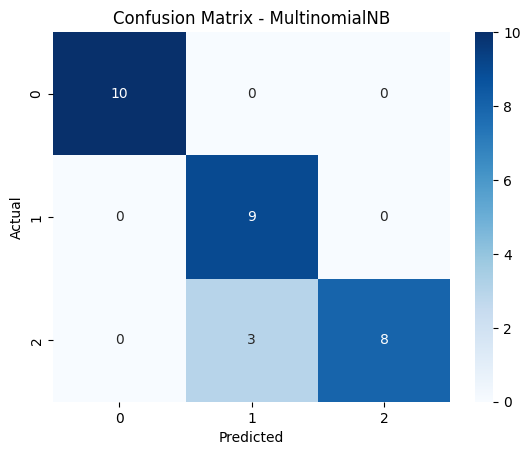

In [49]:
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

conf_matrix =confusion_matrix(y_test,y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap ='Blues')

plt.title("Confusion Matrix - MultinomialNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()